In [32]:
import pandas as pd
import numpy
import seaborn as sns
import datetime

In [27]:
msft = pd.read_csv("data/MSFT.csv", parse_dates=['Date'])
gs = pd.read_csv("data/GS.csv", parse_dates=['Date'])
tsla = pd.read_csv("data/TSLA.csv", parse_dates=['Date'])
v = pd.read_csv("data/V.csv", parse_dates=['Date'])
aapl = pd.read_csv("data/AAPL.csv", parse_dates=['Date'])

In [28]:
msft.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
353,2013-05-31,34.820000,35.279999,34.790001,34.900002,29.547039,56165700
1335,2017-04-25,67.900002,68.040001,67.599998,67.919998,63.649605,30242700
768,2015-01-23,47.360001,47.389999,46.799999,47.180000,41.639881,26211600
2301,2021-02-25,232.080002,234.589996,227.880005,228.990005,228.025925,39542200
100,2012-05-25,29.200001,29.360001,29.010000,29.059999,23.875193,29507200


In [36]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03
mean,94.626551,95.494815,93.741620,94.678880,90.737950,3.400731e+07
std,73.521419,74.215372,72.832065,73.589541,74.979446,1.802483e+07
min,26.379999,26.629999,26.260000,26.370001,21.707487,7.425600e+06
25%,41.167502,41.595000,40.837502,41.240000,36.221183,2.285898e+07
50%,60.994999,61.395000,60.805000,61.105000,56.918037,2.965320e+07
75%,127.842502,129.417496,127.082500,128.129997,124.999542,3.969452e+07
max,338.510010,338.790009,334.529999,336.989990,336.989990,2.484285e+08


In [30]:
msft.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [35]:
msft.iloc[0,:]

Date         2012-01-03 00:00:00
Open                   26.549999
High                   26.959999
Low                    26.389999
Close                      26.77
Adj Close              21.707487
Volume                  64731500
Name: 0, dtype: object

In [40]:
# first date
print(msft.Date.min())
assert msft.Date.min() == gs.Date.min()

2012-01-03 00:00:00


In [33]:
datetime.datetime(2012,1,1)

datetime.datetime(2012, 1, 1, 0, 0)

In [53]:
msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

array([26.77])

In [54]:
msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

0        1.000000
1        1.023534
2        1.033993
3        1.050056
4        1.036235
          ...    
2477    12.567800
2478    12.553605
2479    12.588345
2480    12.549496
2481    12.357116
Name: Close, Length: 2482, dtype: float64

In [ ]:
# add new column for the relative price to the first day in our df
msft["Rel_price"] = msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
v["Rel_price"] = v.Close / v[v.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
aapl["Rel_price"] = aapl.Close / aapl[aapl.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
msft["Rel_price"] = msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
msft["Rel_price"] = msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

<AxesSubplot:xlabel='Date', ylabel='Close'>

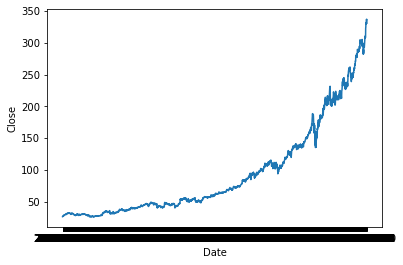

In [16]:
sns.lineplot(x=msft.Date, y=msft.Close, title="Price of ")